Assignment: PCA Implementation

In [3]:
# Objective:
# The objective of this assignment is to implement PCA on a given dataset and analyse the results.

# Instructions:
# Download the wine dataset from the UCI Machine Learning Repository

# Load the dataset into a Pandas dataframe.
# Split the dataset into features and target variables.
# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
# Implement PCA on the preprocessed dataset using the scikit-learn library.
# Determine the optimal number of principal components to retain based on the explained variance ratio.
# Visualise the results of PCA using a scatter plot.
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
# Interpret the results of PCA and clustering analysis.

import pandas as pd

# Load the Wine dataset into a Pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine_df = pd.read_csv(url, names=column_names)


In [5]:
# Step 3: Data Preprocessing
# You may want to standardize the features (scaling) if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df.drop("Class", axis=1))


In [8]:
# Step 4: Implement PCA
from sklearn.decomposition import PCA

# Instantiate PCA with the number of components you want to retain
pca = PCA(n_components=2)  # You can change the number of components as needed
wine_pca = pca.fit_transform(wine_scaled)


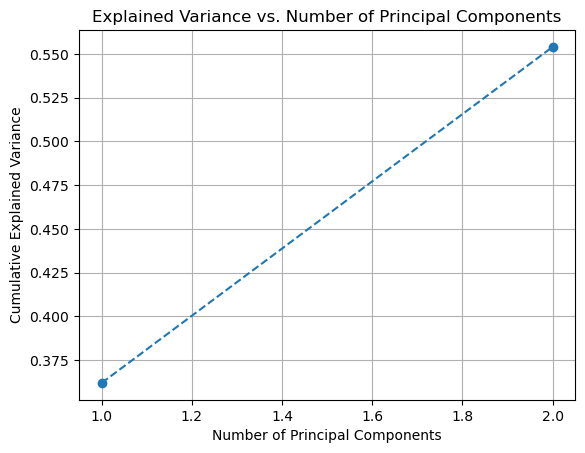

In [9]:
# Step 5: Determine the Optimal Number of Principal Components

import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()


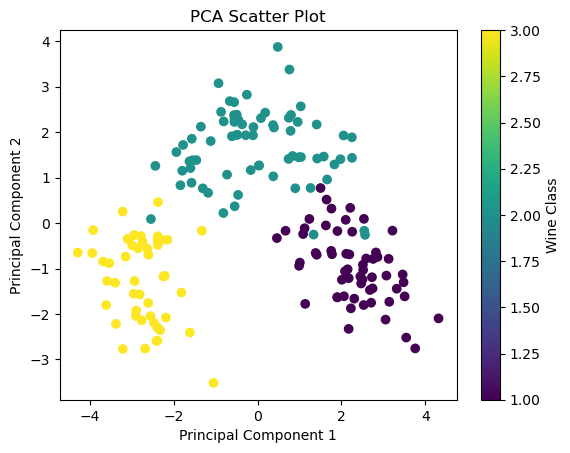

In [10]:
# Step 6: Visualize the Results
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine_df["Class"], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Wine Class')
plt.show()


In [11]:
# Step 7: Perform Clustering with K-Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
wine_clusters = kmeans.fit_predict(wine_pca)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Step 8: Interpret Results
Interpret the results of PCA and clustering analysis in your report. Include insights about the optimal number of components, how the data clusters based on PCA components, and any other relevant findings.

Step 9: Generate Performance Metrics for Clustering
You can generate performance metrics for clustering if you have access to ground truth labels (which you do in this case, as the Wine dataset has class labels). You can use metrics like Adjusted Rand Index (ARI), Silhouette Score, or others to evaluate the quality of clustering.